In [105]:
import os

os.chdir("/home/coinse/Workspace/SBFL")

In [106]:
from evaluate_dfcpp import *

# d4cpp bugs

In [107]:
import pandas as pd


def load_sbfl_result():
    return pd.read_csv("output_function.csv")


sbfl_df = load_sbfl_result()
display(sbfl_df)

bugs = sorted([elem.split("-") for elem in set(sbfl_df.bug.values.tolist())])
bugs = [(tup[0], int(tup[1])) for tup in bugs]
print("Total bugs:", len(bugs))
pids = set([tup[0] for tup in bugs])
for pid in pids:
    vids = [tup[1] for tup in bugs if tup[0] == pid]
    minvid, maxvid = min(vids), max(vids)
    vidrange = set(range(minvid, maxvid + 1))
    missing = vidrange - set(vids)
    curr_min = minvid
    range_str = ""
    while missing:
        min_missing = min(missing)
        missing.remove(min_missing)
        max_before_missing = min_missing - 1
        if max_before_missing == curr_min:
            range_str += f"{curr_min},"
        else:
            range_str += f"{curr_min}-{max_before_missing},"
        curr_min = min({elem for elem in vids if elem > min_missing})
        missing = {elem for elem in missing if elem > curr_min}
    if curr_min == maxvid:
        range_str += f"{curr_min}"
    else:
        range_str += f"{curr_min}-{maxvid}"
    print(f"{pid} ({len(vids)}) :{range_str}")


formulas = set(sbfl_df.formula.values.tolist())
print(f"{formulas=}")
aggs = set(sbfl_df.aggregation_scheme.values.tolist())
print(f"{aggs=}")


,bug,num_total_files,num_total_functions,formula,aggregation_scheme,buggy_function,rank_min,rank_average,rank_max
0,cppcheck-1,125,2314,Ochiai,max_aggregation,"('/home/workspace/lib/checkleakautovar.cpp', '...",1.0,7.0,13.0
1,cppcheck-1,125,2314,Ochiai,mean_aggregation,"('/home/workspace/lib/checkleakautovar.cpp', '...",14.0,14.0,14.0
2,cppcheck-1,125,2314,Ochiai,min_rank_based_voting,"('/home/workspace/lib/checkleakautovar.cpp', '...",3.0,3.0,3.0
3,cppcheck-1,125,2314,Ochiai,dense_rank_based_voting,"('/home/workspace/lib/checkleakautovar.cpp', '...",6.0,6.0,6.0
4,cppcheck-1,125,2314,Ochiai,dense_rank_based_suspiciousness_aware_voting,"('/home/workspace/lib/checkleakautovar.cpp', '...",3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
3115,yara-5,50,473,GP13,mean_aggregation,"('parser.c', 'yr_parser_reduce_rule_declaratio...",5.0,5.0,5.0
3116,yara-5,50,473,GP13,min_rank_based_voting,"('parser.c', 'yr_parser_reduce_rule_declaratio...",4.0,4.0,4.0
3117,yara-5,50,473,GP13,dense_rank_based_voting,"('parser.c', 'yr_parser_reduce_rule_declaratio...",22.0,22.0,22.0
3118,yara-5,50,473,GP13,dense_rank_based_suspiciousness_aware_voting,"('parser.c', 'yr_parser_reduce_rule_declaratio...",6.0,6.0,6.0


Total bugs: 92
example (1) :1
proj (23) :1-12,14-21,24,27-28
libucl (6) :1-6
cppcheck (30) :1-30
libchewing (7) :1-2,4-8
wireshark (4) :1-2,4,6
openssl (10) :1,6,12,17-18,20,24-27
yara (4) :1-3,5
xbps (4) :1-2,4-5
wget2 (3) :1-3
formulas={'Ochiai', 'Tarantula', 'Jaccard', 'Op2', 'GP13'}
aggs={'dense_rank_based_voting', 'max_aggregation', 'dense_rank_based_suspiciousness_aware_voting', 'min_rank_based_voting', 'dense_rank_based_tie_aware_voting', 'mean_aggregation'}


# Helper functions

In [108]:
def get_sbfl_rank(pid, vid, formula="Op2", aggs="max_aggregation"):
    bid = f"{pid}-{vid}"
    return sbfl_df[(sbfl_df.bug == bid) & (sbfl_df.formula == formula) & (sbfl_df.aggregation_scheme == aggs)].rank_max.values[0]

get_sbfl_rank("libchewing", 1)

87.0

In [109]:
def load_bug_data(pid, vid):
    bug = Bug(pid, vid)
    path_to_output = f"/home/coinse/Workspace/defects4cpp/coverage/{pid}_{vid}_buggy"
    bug.load_output(path_to_output)
    return bug
bug = load_bug_data("libchewing", 1)

In [110]:
print(f"{bug.buggy_files=}")
print(f"{bug.buggy_lines=}")
print("bug.coverage_df=")
display(bug.coverage_df)
print(f"{bug.failing_tests=}")
print(f"{bug.failing_tests_GT=}")
print("bug.functions={", end="")
for func in sorted(bug.functions)[:5]:
    print(f"{func},", end=" ")
print(", ...}")
print(f"{bug.id=}")
print(f"{bug.num_test_cases=}")
print(f"{bug.passing_tests=}")
print(f"{bug.path_to_cov_df=}")
print(f"{bug.path_to_patch=}")
print(f"{bug.path_to_test_results=}")
print(f"{bug.source_files=}")

bug.buggy_files={'src/chewingio.c'}
bug.buggy_lines={('src/chewingio.c', 696), ('src/chewingio.c', 697), ('src/chewingio.c', 698)}
bug.coverage_df=


9  \
file                                              function           line        
/home/workspace/src/common/chewing-utf8-util.c    ueStrLen           28     44   
                                                                     30     44   
                                                                     31     44   
                                                                     33    387   
                                                                     34    343   
...                                                                        ...   
/home/workspace/src/porting_layer/src/plat_path.c find_path_by_files 191     4   
                                                                     192     4   
                                                                     193     4   
                                                                     194     4   
                                                                     197     0   

                                                                             12  \
file                                              function           line         
/home/workspace/src/common/chewing-utf8-util.c    ueStrLen           28     335   
                                                                     30     335   
                                                                     31     335   
                                                                     33    2659   
                                                                     34    2324   
...                                                                         ...   
/home/workspace/src/porting_layer/src/plat_path.c find_path_by_files 191     24   
                                                                     192     24   
                                                                     193     24   
                                                                     194     24   
                                                                     197      0   

                                                                            13  \
file                                              function           line        
/home/workspace/src/common/chewing-utf8-util.c    ueStrLen           28     46   
                                                                     30     46   
                                                                     31     46   
                                                                     33    393   
                                                                     34    347   
...                                                                        ...   
/home/workspace/src/porting_layer/src/plat_path.c find_path_by_files 191     4   
                                                                     192     4   
                                                                     193     4   
                                                                     194     4   
                                                                     197     0   

                                                                           4  \
file                                              function           line      
/home/workspace/src/common/chewing-utf8-util.c    ueStrLen           28    0   
                                                                     30    0   
                                                                     31    0   
                                                                     33    0   
                                                                     34    0   
...                                                                       ..   
/home/workspace/src/porting_layer/src/plat_path.c find_path_by_files 191   0   
                                                                     192   0   
                                                               

bug.failing_tests={'12'}
bug.failing_tests_GT={'12'}
bug.functions={('/home/workspace/include/internal/chewing-private.h', 'max'), ('/home/workspace/include/internal/chewing-private.h', 'min'), ('/home/workspace/src/bopomofo.c', 'BopomofoIsEntering'), ('/home/workspace/src/bopomofo.c', 'BopomofoPhoInput'), ('/home/workspace/src/bopomofo.c', 'BopomofoRemoveAll'), , ...}
bug.id='libchewing-1'
bug.num_test_cases=18
bug.passing_tests={'13', '17', '15', '11', '14', '8', '9', '6', '10', '7', '3', '5', '2', '4', '1', '18', '16'}
bug.path_to_cov_df='/home/coinse/Workspace/defects4cpp/coverage/libchewing_1_buggy/coverage_df.pkl'
bug.path_to_patch='/home/coinse/Workspace/defects4cpp/defects4cpp/taxonomy/libchewing/patch/0001-buggy.patch'
bug.path_to_test_results='/home/coinse/Workspace/defects4cpp/coverage/libchewing_1_buggy/test_results.json'
bug.source_files={'/home/workspace/src/tree.c', '/home/workspace/src/dict.c', '/home/workspace/src/compat.c', '/home/workspace/src/choice.c', '/home/works

# Test 숫자

In [111]:
num_tests = []
for bug in bugs:
    print(f".", end="")
    bid = f"{bug[0]}-{bug[1]}"
    num_test = load_bug_data(bug[0], bug[1]).num_test_cases
    num_tests.append([bid, num_test])
num_test_df = pd.DataFrame(num_tests, columns=["bug", "num_test"])
print()
display(num_test_df)

def get_num_test(pid, vid):
    bid = f"{pid}-{vid}"
    return num_test_df[num_test_df.bug == bid].num_test.values[0]
get_num_test("libchewing", 1)

............................................................................................


,bug,num_test
0,cppcheck-1,75
1,cppcheck-10,92
2,cppcheck-11,85
3,cppcheck-12,85
4,cppcheck-13,91
...,...,...
87,xbps-5,207
88,yara-1,201
89,yara-2,244
90,yara-3,245


18

/home/coinse/.pyenv/versions/3.9.1/envs/dfcpp-3.9-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


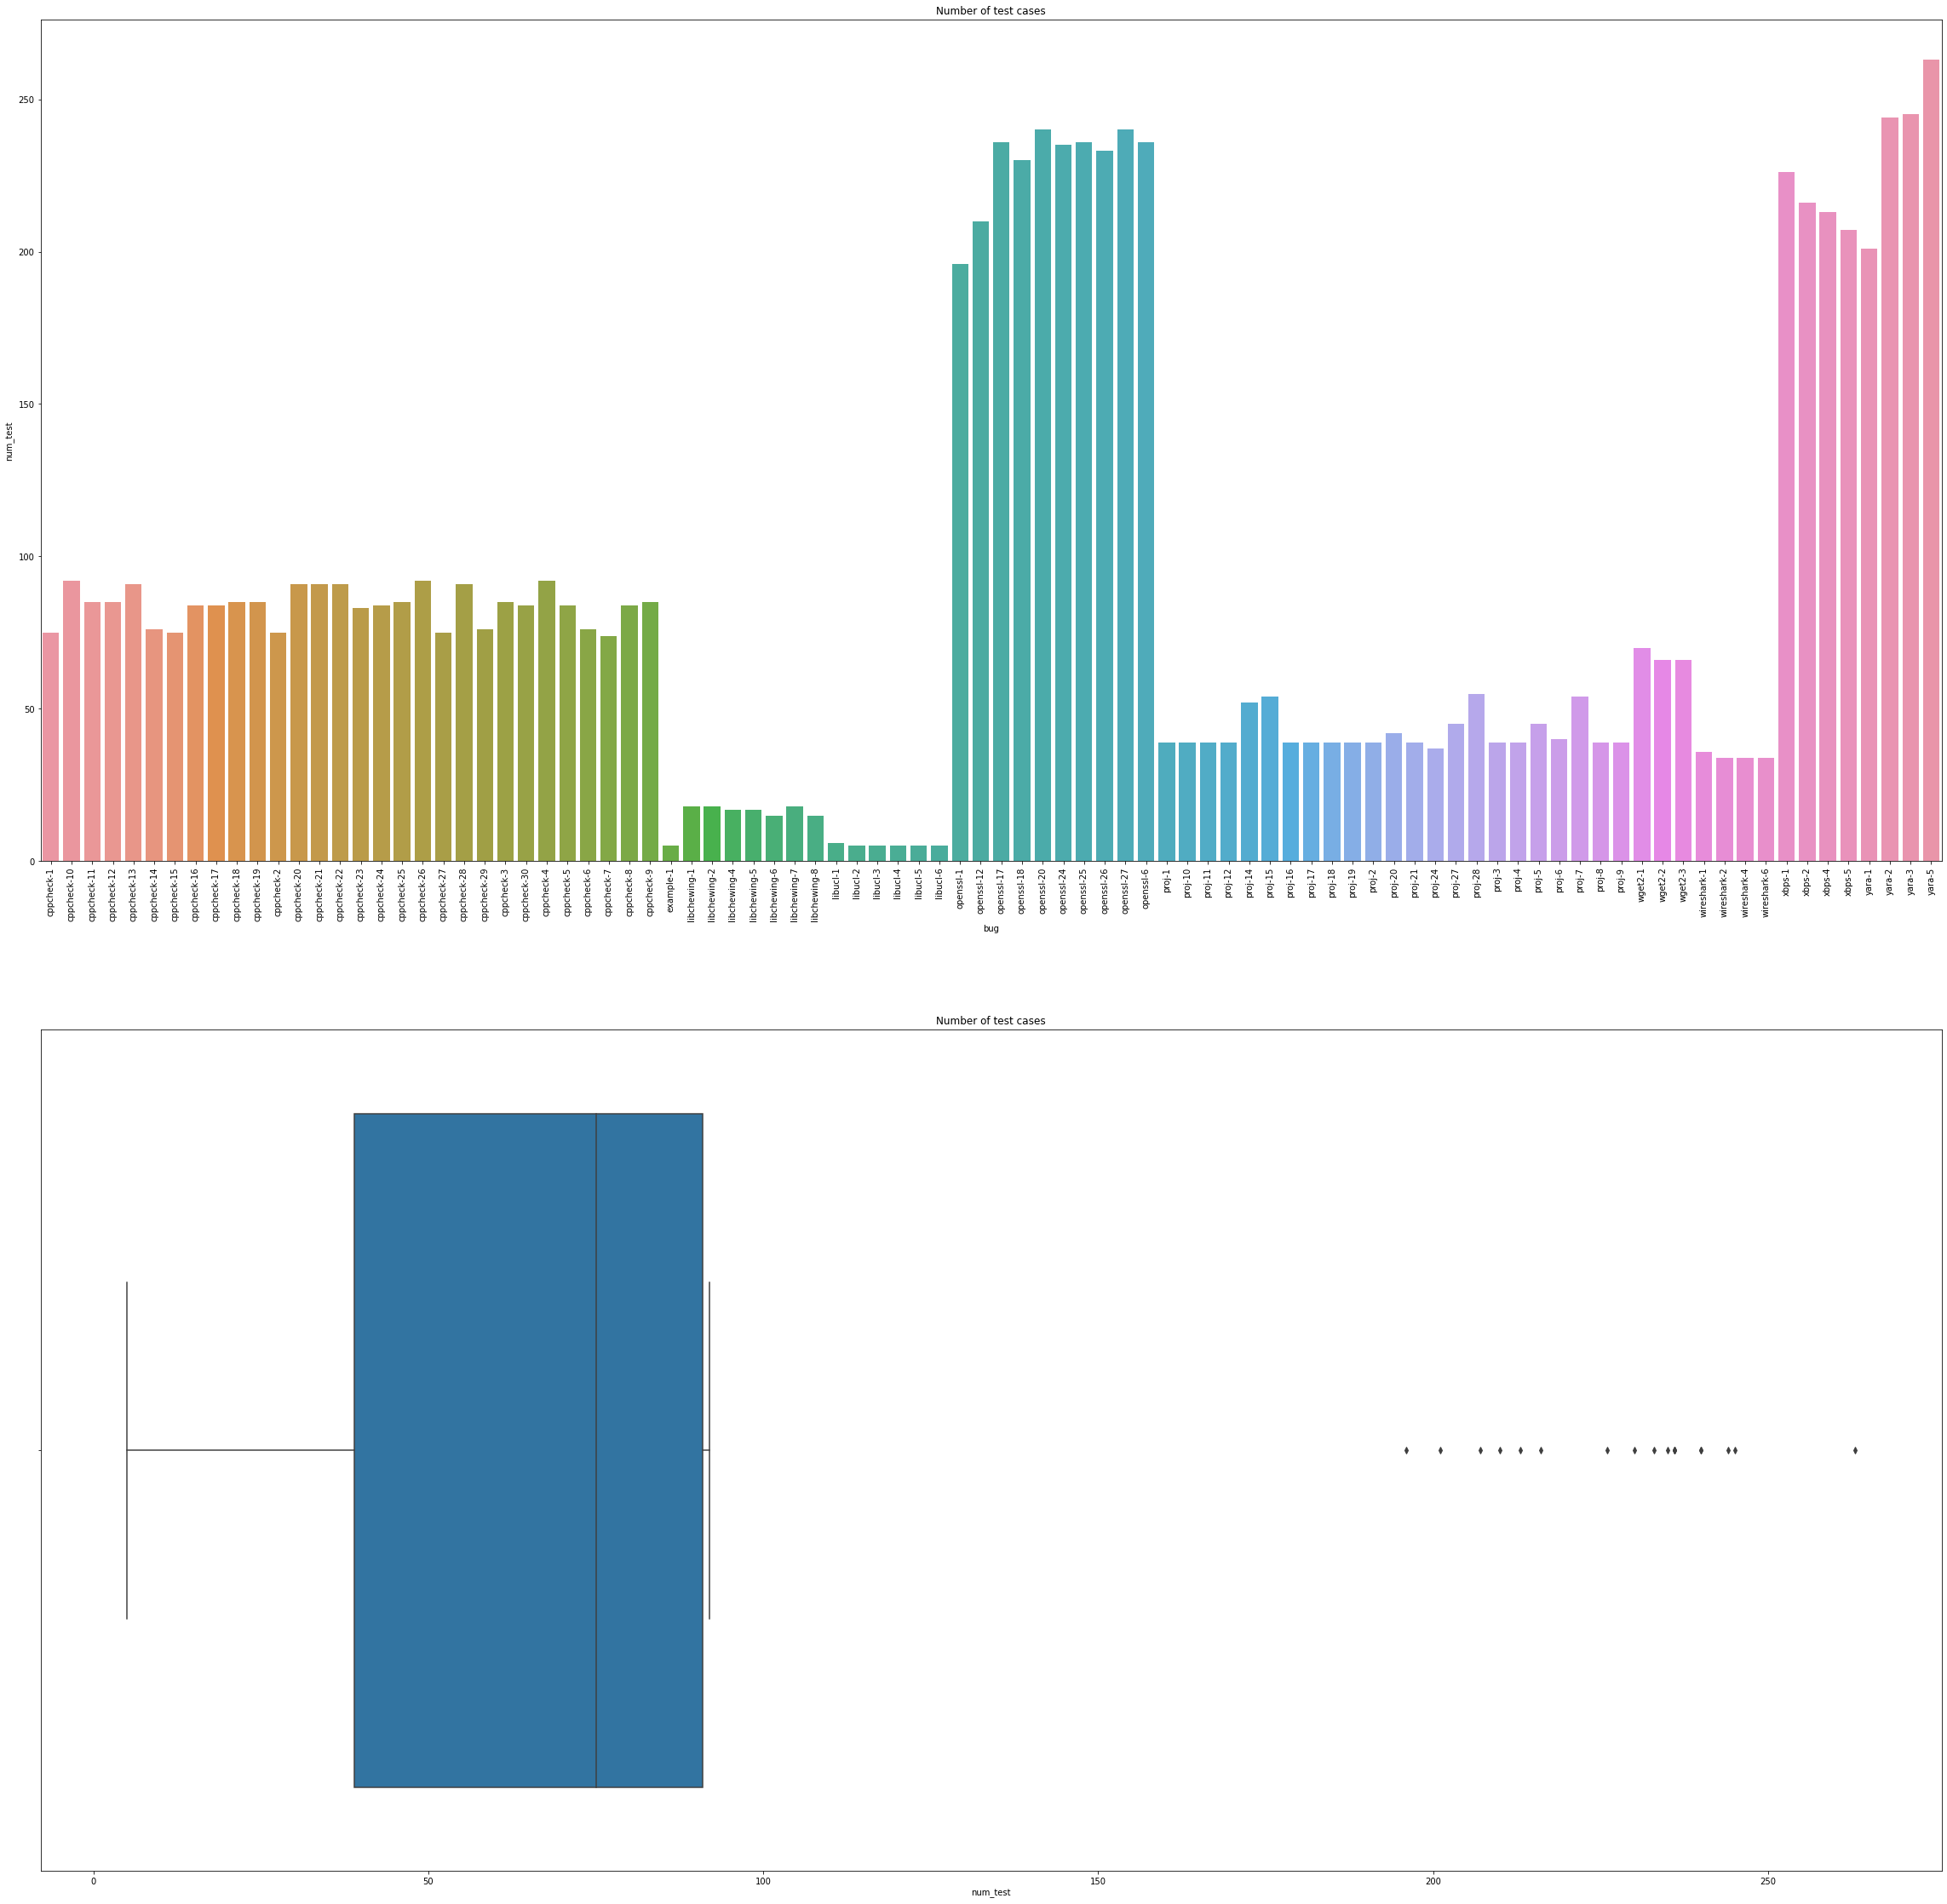

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

figs, axes = plt.subplots(2, 1, figsize=(40, 40))
sns.barplot(x="bug", y="num_test", data=num_test_df, ax=axes[0])
axes[0].set_title("Number of test cases")
# rotate x labels
for label in axes[0].get_xticklabels():
    label.set_rotation(90)
sns.boxplot(num_test_df["num_test"], ax=axes[1])
axes[1].set_title("Number of test cases")
plt.show()

# Best SBFL 분석

In [143]:
def get_tcs_cov(covmat, idx):
    cov_of_idx = covmat.loc[[idx]]
    return set(cov_of_idx.columns[cov_of_idx.values[0]])


def get_idx_covby(covmat, tcs, typ):
    sub_covmat = covmat[list(tcs)]
    if typ == "not":
        bool_vec = ~sub_covmat.any(axis=1)
    else:
        bool_vec = sub_covmat.all(axis=1)
    return set(covmat.index[bool_vec])


def find_func(pid, covmat, fault_idx, debug):
    if pid in ["libucl", "wget2", "xbps", "yara"]:
        fault_idx = (fault_idx[0].split("/")[-1], fault_idx[1])
    cov_cands = covmat.index.values.tolist()
    matching_cands = [
        idx_tup
        for idx_tup in cov_cands
        if idx_tup[0].endswith(fault_idx[0]) and idx_tup[2] == fault_idx[1]
    ]
    if len(matching_cands) == 1:
        return True, (matching_cands[0][0], matching_cands[0][1])
    elif len(matching_cands) > 2:
        if debug:
            print("matching_cand:")
            for cand in sorted(matching_cands):
                print(f"{cand}")
            print(f"More than one candidate found for {fault_idx}")
        return False, f"More than one candidate found for {fault_idx}"
    else:
        match_file_cands = [
            idx_tup
            for idx_tup in cov_cands
            if idx_tup[0].endswith(fault_idx[0])
        ]
        if len(match_file_cands) == 0:
            if debug:
                print(f"No file level candidate found for {fault_idx}")
            return False, f"No file level candidate found for {fault_idx}"
        try:
            closest_less_cand = max(
                [cand for cand in match_file_cands if cand[2] < fault_idx[1]],
                key=lambda cand: cand[2],
            )
        except ValueError as e:
            if debug:
                print(
                    f"No less than candidate found for {fault_idx}; Need to debug"
                )
            return (
                False,
                f"No less than candidate found for {fault_idx}; Need to debug",
            )
        try:
            closest_greater_cand = min(
                [cand for cand in match_file_cands if cand[2] > fault_idx[1]],
                key=lambda cand: cand[2],
            )
        except ValueError as e:
            if debug:
                print(
                    f"No greater than candidate found for {fault_idx}; Need to debug"
                )
            return (
                False,
                f"No greater than candidate found for {fault_idx}; Need to debug",
            )
        if closest_less_cand[1] == closest_greater_cand[1]:
            if debug:
                print(
                    f"{fault_idx} is in the middle of {closest_less_cand} and {closest_greater_cand}"
                )
            return True, (closest_less_cand[0], closest_less_cand[1])
        else:
            if debug:
                print("No exact match found")
            return False, "No exact match found"


def always_higher_rank(pid, vid, debug=False):
    bug_data = load_bug_data(pid, vid)
    covmat = bug_data.coverage_df.copy().astype(bool)
    if debug:
        display(covmat)
    fault_idxs = sorted(bug_data.buggy_lines)
    if debug:
        print(f"{fault_idxs=}")
    if debug:
        print(f"{covmat.index.values.tolist()[0]=}")
    fault_meths = set()
    err_msg = ""
    for fault_idx in fault_idxs:
        succ, ret = find_func(pid, covmat, fault_idx, debug)
        if succ:
            fault_meths.add(ret)
        else:
            err_msg += f"{ret}\n"
    # fault_meths = {
    #     find_func(pid, covmat, fault_idx, debug) for fault_idx in fault_idxs
    # }
    if None in fault_meths:
        fault_meths.remove(None)
    if debug:
        print(f"{fault_meths=}")
    fail_tcs = bug_data.failing_tests
    if debug:
        print(f"{fail_tcs=}")
    pass_tcs = bug_data.passing_tests
    if debug:
        print(f"{pass_tcs=}")

    hgh_rank_dict = {}
    covmat.sort_index(inplace=True)
    for fault_meth in fault_meths:
        if debug:
            display(covmat.loc[fault_meth])
        meth_idxs = [
            tuple([*fault_meth, idx])
            for idx in covmat.loc[fault_meth].index.values
        ]
        if debug:
            print("meth_idxs=")
            for meth_idx in meth_idxs:
                print(meth_idx)
        for meth_idx in meth_idxs:
            tcs_cov_fidx = get_tcs_cov(covmat, meth_idx)
            if debug:
                print(f"{tcs_cov_fidx=}")
            ptcs_ncov_fidx = pass_tcs - set(tcs_cov_fidx)
            ftcs_cov_fidx = set(tcs_cov_fidx) & fail_tcs
            if debug:
                print(f"{ptcs_ncov_fidx=}, {ftcs_cov_fidx=}")
            idxs_covby_ptcs = get_idx_covby(covmat, ptcs_ncov_fidx, typ="not")
            idxs_covby_ftcs = get_idx_covby(covmat, ftcs_cov_fidx, typ="cov")
            idxs_hgh_rank = idxs_covby_ptcs & idxs_covby_ftcs
            if debug:
                print(f"{len(idxs_hgh_rank)=}")
            assert meth_idx in idxs_hgh_rank
            idxs_hgh_rank.remove(meth_idx)
            hgh_rank_dict[meth_idx] = idxs_hgh_rank

    hgh_rank_meth_dict = {
        fidx: {
            idx[0:2]
            for idx in hgh_rank_idxs
            if idx[0:2] != fidx[0:2] and pd.notna(idx[1])
        }
        for fidx, hgh_rank_idxs in hgh_rank_dict.items()
    }

    hgh_rank_meth_cnt_dict = {
        meth: len(hgh_meths) for meth, hgh_meths in hgh_rank_meth_dict.items()
    }
    return hgh_rank_dict, hgh_rank_meth_dict, hgh_rank_meth_cnt_dict, err_msg


pid, vid = "libchewing", 1
(
    hgh_rank_dict,
    hgh_rank_meth_dict,
    hgh_rank_meth_cnt_dict,
    err_msg,
) = always_higher_rank(pid, vid)
print(
    min(hgh_rank_meth_cnt_dict.values()), get_sbfl_rank(pid, vid), f"{err_msg=}"
)


44 87.0 err_msg=''


In [145]:
import warnings

warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

print("pid vid    \tRB Rmax Rdrsv #T")
for pid, vid in bugs:
    print(pid, vid, end="\t")
    (
        hgh_rank_dict,
        hgh_rank_meth_dict,
        hgh_rank_meth_cnt_dict,
        err_msg
    ) = always_higher_rank(pid, vid)
    if len(hgh_rank_meth_dict) == 0:
        print("No high rank methods")
    else:
        print(
            min(hgh_rank_meth_cnt_dict.values()) + 1,
            int(get_sbfl_rank(pid, vid)),
            int(
                get_sbfl_rank(
                    pid,
                    vid,
                    aggs="dense_rank_based_suspiciousness_aware_voting",
                )
            ),
            get_num_test(pid, vid),
            f"{err_msg=}",
        )


pid vid    	RB Rmax Rdrsv #T
cppcheck 1	13 13 3 75 err_msg=''
cppcheck 10	81 402 424 92 err_msg=''
cppcheck 11	35 35 12 85 err_msg=''
cppcheck 12	92 92 12 85 err_msg='No exact match found\n'
cppcheck 13	20 20 8 91 err_msg=''
cppcheck 14	86 86 3 76 err_msg=''
cppcheck 15	27 27 4 75 err_msg=''
cppcheck 16	20 105 120 84 err_msg=''
cppcheck 17	52 52 24 84 err_msg=''
cppcheck 18	23 43 9 85 err_msg='No exact match found\nNo exact match found\n'
cppcheck 19	30 30 29 85 err_msg=''
cppcheck 2	87 87 22 75 err_msg=''
cppcheck 20	46 46 7 91 err_msg=''
cppcheck 21	48 48 12 91 err_msg=''
cppcheck 22	32 32 6 91 err_msg=''
cppcheck 23	8 20 10 83 err_msg=''
cppcheck 24	39 39 17 84 err_msg=''
cppcheck 25	32 118 147 85 err_msg=''
cppcheck 26	47 331 491 92 err_msg=''
cppcheck 27	59 59 12 75 err_msg=''
cppcheck 28	29 29 1 91 err_msg=''
cppcheck 29	67 67 99 76 err_msg=''
cppcheck 3	85 85 44 85 err_msg=''
cppcheck 30	38 130 73 84 err_msg=''
cppcheck 4	13 13 1 92 err_msg=''
cppcheck 5	28 28 6 84 err_msg=''
cp